**Import libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import re # for removing punctuation
from pprint import pprint # pretty print

#preprocessing
import csv
import simplemma
from simplemma import lemmatize

#interpret the results from LDA
import pyLDAvis 
import pyLDAvis.gensim
import pickle # for html export

from gensim.corpora import Dictionary
from gensim.models import LdaMulticore, LdaModel, CoherenceModel

**Inputs**

In [2]:
remove_punct='[],.?]'

#test number of topics
n_topics=list(range(1,11))

# Specify the path to your CSV file
csv_file_path = 'other/stop_words_czech.txt'

# Specify the path to your model
model_name='results/lda_visualization_data.pkl'

file_name='data.csv'

**Load data**

In [3]:
data = pd.read_csv('input/' + file_name, encoding='utf-8', delimiter=';')
data.head(5)

,sentences
0,Fotbalový zápas byl velmi napínavý.
1,Vlci vyhledávají kořist společně ve smečkách.
2,Kostýmní výtvarník navrhuje unikátní oblečení ...
3,Filmový scénář je klíčový pro vývoj a struktur...
4,Plavkyně dosáhla kvalifikace na letní olympiád...


In [4]:
sentences= [item for sublist in data.values.tolist() for item in sublist]

In [5]:
len(sentences)

150

In [6]:
sentences[:5]

['Fotbalový zápas byl velmi napínavý.',
 'Vlci vyhledávají kořist společně ve smečkách.',
 'Kostýmní výtvarník navrhuje unikátní oblečení pro každou postavu.',
 'Filmový scénář je klíčový pro vývoj a strukturu příběhu.',
 'Plavkyně dosáhla kvalifikace na letní olympiádu ve sprintu.']

## Remove punctuation and lowercase

In [7]:
def remove_punctuation(list):
    processed_sentences = [re.sub(remove_punct, '', sentence) for sentence in list]
    return processed_sentences

def change_lowercase(list):
    processed_sentences = [sentence.lower() for sentence in list]
    return processed_sentences

In [8]:
# remove punctuation
processed_sentences = remove_punctuation(sentences)

# lower case
processed_sentences = change_lowercase(processed_sentences)

# check the results
processed_sentences[0]

'fotbalový zápas byl velmi napínavý'

## Tokenize

In [9]:
# Tokenize the sentences
def tokenize(processed_sentences):
    tokenized_sentences = [sentence.split() for sentence in processed_sentences]
    return tokenized_sentences

In [10]:
tokenized_sentences=tokenize(processed_sentences)
tokenized_sentences[0]

['fotbalový', 'zápas', 'byl', 'velmi', 'napínavý']

## Remove stopwords

In [11]:
def read_stopwords(csv_file_path):
    # Create an empty list to store data
    data_list = []

    # Open the CSV file and read its contents
    with open(csv_file_path, 'r', newline='', encoding='utf-8') as file:
        # Create a CSV reader object
        csv_reader = csv.reader(file)
        # iterate through the list
        [data_list.extend(row) for row in csv_reader ]              
    return data_list

In [12]:
stop_words=read_stopwords(csv_file_path)
stop_words[:5]

['ačkoli', 'ahoj', 'ale', 'anebo', 'ano']

In [13]:
def remove_stopwords(tokens, stop_words):
    all_lists = []

    for inner_list in tokens:
        cleaned_list = [word for word in inner_list if word not in stop_words]
        all_lists.append(cleaned_list)

    return all_lists

In [14]:
tokenized_sentences_cleaned=remove_stopwords(tokenized_sentences, stop_words)
tokenized_sentences_cleaned[0]

['fotbalový', 'zápas', 'velmi', 'napínavý']

In [15]:
#count words
def comprehensive_word_count(list_of_lists):
    # Flatten the list of lists into a single list of words
    all_words = [word for inner_list in list_of_lists for word in inner_list]
    # Calculate the total count of all words
    total_count = len(all_words)
    return total_count

In [16]:
# Calculate comprehensive word counts
word_counts_before = comprehensive_word_count(tokenized_sentences)
word_counts_after = comprehensive_word_count(tokenized_sentences_cleaned)

print(f' words before: {word_counts_before} \n words after {word_counts_after}')

 words before: 1202 
 words after 924


## Tagging

In [17]:
#TODO: tagg tokens and then try to stemming of verbs and skipping of prepositions and lemmatazing the nouns only

## Lemmatization

In [18]:
simplemma.lemmatize('jablka', lang=('cs'), greedy=True) #greedy=True,  when there are multiple possible lemmatizations, the lemmatizer will choose the most frequent lemma

'jablko'

In [19]:
def lemmatization(tokens):
    all_lists = []

    for inner_list in tokens:
        cleaned_list = [simplemma.lemmatize(word, lang=('cs'), greedy=True) for word in inner_list ]
        all_lists.append(cleaned_list)

    return all_lists

In [20]:
tokenized_sentences_cleaned=lemmatization(tokenized_sentences_cleaned)
tokenized_sentences_cleaned[0]

['fotbalový', 'zápas', 'velmi', 'napínavý']

In [21]:
#compare with the original
sentences[0]

'Fotbalový zápas byl velmi napínavý.'

## WORD CLOUD (visualize the most common words)

In [22]:
from wordcloud import WordCloud

In [23]:
merged_sentences=[word for sublist in tokenized_sentences_cleaned for word in sublist]
merged_sentences[:5]

['fotbalový', 'zápas', 'velmi', 'napínavý', 'vlk']

In [24]:
merged_sentences_join = ' '.join(merged_sentences)
merged_sentences_join

'fotbalový zápas velmi napínavý vlk vyhledat kořist společně smečka kostýmní výtvarník navrhovat unikátní oblečený každý postava filmový scénář klíčový vývoj struktura příběh plavec dosáhnout kvalifikace letnit olympiádu sprintu romantický komedie oslovovat divák humor příběh akční film nabízet sled neuvěřitelný adrenalinový scéna filmový kamera zachytit nádherný vizuální scéna kompozice zápasník bojovat judo turnaj krokodýl plavat řeka čekat kořist skokan lyže doskočil dlouhý vzdálenost hokejový obránce bránit branka útočník tenisový turnaj probíhat antukovém dvorci atletka překonat osobní rekord běh 800 metr ryba šupiny žít sladký slaný voda velbloud unikátní hrbolatý hřbet adaptovat život poušť jezdec kůň překonávají překážkovat dráha režisérská vize utváří estetiku styl celý film akční thriller nabízet nespočetný množství napínavý momentů plavkyně zdolat bazénový dráha rychlý plavání kraulem dramatický film vyprávět silný dojemný příběh slon obrovský savec sloní klůny chobot fotbal

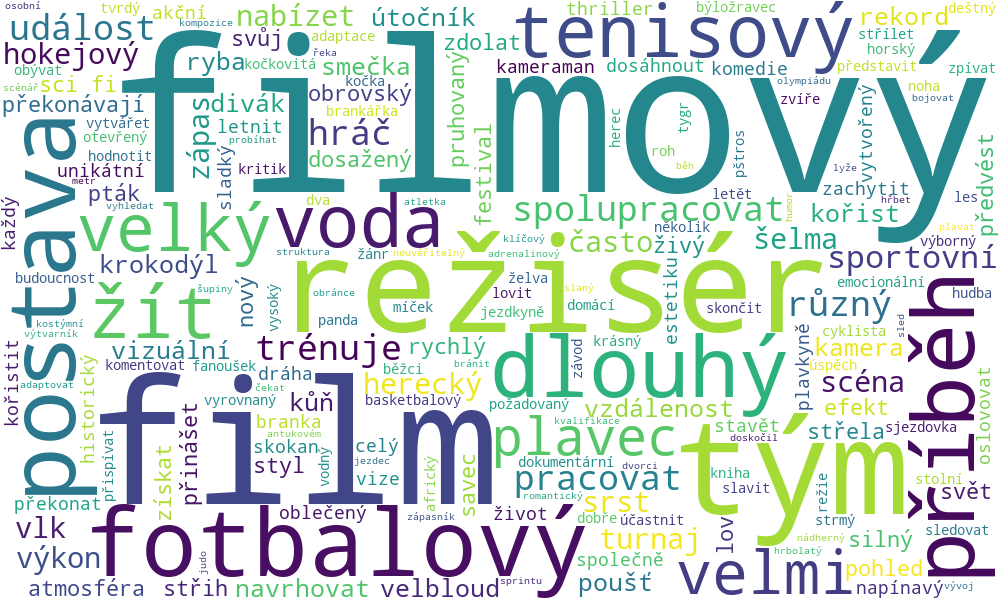

In [25]:
wordcloud = WordCloud(width=1000, height=600, background_color='white').generate(merged_sentences_join)
wordcloud.to_image()

## Create dictionary and corpus (BOW=Bag-Of-Words)

In [26]:
# Create a Gensim dictionary
dictionary = Dictionary(tokenized_sentences_cleaned)

# Create a corpus - matrix with tuple (word_id, word_frequency) for each sentence
corpus = [dictionary.doc2bow(tokens) for tokens in tokenized_sentences_cleaned]

In [27]:
len(corpus)

150

In [28]:
corpus[:2]

[[(0, 1), (1, 1), (2, 1), (3, 1)], [(4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]]

## Train different models

In [29]:
results=pd.DataFrame()
counter=0

for item in n_topics:
    # Train an LDA model 
    lda_model = LdaModel(
        corpus=corpus,
        num_topics=item,
        id2word=dictionary,
        passes=100,  # the higher the more likely to converge
        random_state=42 # makes sure that it initiates with the same conditions
    )


    # Calculate coherence score
    coherence_model = CoherenceModel(model=lda_model, texts=tokenized_sentences_cleaned, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()

    # Calculate perplexity
    """ Lower Perplexity is Better: A lower perplexity value suggests that the model is better at predicting the observed data. 
    Therefore, if you compare two models and find that one has a lower perplexity than the other, 
    it's an indication that the former is likely a better model for the given data. """
    perplexity = lda_model.log_perplexity(corpus)
   
    #write into a table
    results.loc[counter, 'number of topics'] = item
    results.loc[counter, 'coherence score [%]'] = round(coherence_score*100,2)
    results.loc[counter, 'perplexity'] = round(perplexity,2)

    counter+=1

In [30]:
results

,number of topics,coherence score [%],perplexity
0,1.0,69.77,-6.53
1,2.0,68.04,-6.70
2,3.0,63.31,-6.86
3,4.0,65.66,-7.00
4,5.0,64.20,-7.05
5,6.0,64.99,-7.14
6,7.0,65.09,-7.19
7,8.0,62.49,-7.24
8,9.0,62.33,-7.28
9,10.0,61.47,-7.30


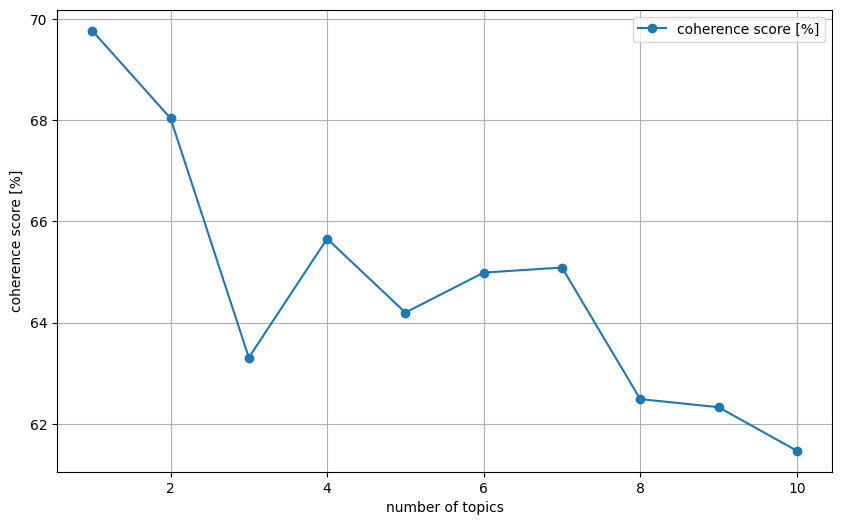

In [31]:
results.plot(x='number of topics', y='coherence score [%]', figsize=(10,6), marker='o')
plt.ylabel('coherence score [%]')
plt.grid(True)
plt.show()

## Choose the best model

In [32]:
n_topics=3

In [33]:
# Train the best model
lda_model = LdaModel(
    corpus=corpus,
    num_topics=n_topics,
    id2word=dictionary,
    passes=100,  # the higher the more likely to converge
    random_state=42 # makes sure that it initiates with the same conditions
)

#multicore option
""" # Train the LDA model with multicore processing
lda_model = LdaMulticore(
    corpus=corpus,
    num_topics=3,
    id2word=dictionary,
    passes=15, # the higher the more likely to converge 
    workers=4  # Set the number of CPU cores to use
) """

' # Train the LDA model with multicore processing\nlda_model = LdaMulticore(\n    corpus=corpus,\n    num_topics=3,\n    id2word=dictionary,\n    passes=15, # the higher the more likely to converge \n    workers=4  # Set the number of CPU cores to use\n) '

In [34]:
#print the results

""" These probabilities indicate the likelihood of each word being associated with the given topic. 
he higher the probability, the more important the word is for that topic. """

pprint(lda_model.print_topics())

[(0,
  '0.010*"velký" + 0.010*"často" + 0.010*"vlk" + 0.008*"různý" + '
  '0.008*"spolupracovat" + 0.008*"pták" + 0.008*"lov" + 0.008*"smečka" + '
  '0.005*"kořist" + 0.005*"krokodýl"'),
 (1,
  '0.029*"filmový" + 0.013*"film" + 0.010*"žít" + 0.010*"příběh" + '
  '0.010*"voda" + 0.008*"plavec" + 0.008*"dlouhý" + 0.008*"nabízet" + '
  '0.006*"zápas" + 0.006*"tenisový"'),
 (2,
  '0.017*"filmový" + 0.013*"postava" + 0.012*"film" + 0.012*"tým" + '
  '0.010*"režisér" + 0.010*"hráč" + 0.010*"pracovat" + 0.010*"událost" + '
  '0.009*"fotbalový" + 0.008*"trénuje"')]


## Plot the results

In [35]:
pyLDAvis.enable_notebook()

In [36]:
# Visualize the LDA model using PyLDAvis
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary, n_jobs=1, sort_topics=False)

# Save the PyLDAvis data

with open(model_name, 'wb') as f:
    pickle.dump(LDAvis_prepared, f)

In [37]:
# Load pickle
# Load the PyLDAvis' data
with open(model_name, 'rb') as f:
    loaded_data = pickle.load(f)

In [38]:
# save html
pyLDAvis.save_html(loaded_data, model_name + '.html')

In [39]:
# display the results
pyLDAvis.display(loaded_data)

## Sort out new sentence

In [40]:
new_sentence="hráč dal gól v hokejovém zápase"
new_sentence=[new_sentence]

#Preprocessing
preprocessed_sentence=remove_punctuation(new_sentence)
preprocessed_sentence=change_lowercase(preprocessed_sentence)
preprocessed_sentence=tokenize(preprocessed_sentence)
preprocessed_sentence=remove_stopwords(preprocessed_sentence, stop_words)
preprocessed_sentence=lemmatization(preprocessed_sentence)

print(f'Preprocessed sentence: {preprocessed_sentence}')

# Flatten the list of lists into a single list
preprocessed_sentence = [token for sublist in preprocessed_sentence for token in sublist]

# Create a bag-of-words representation for the new sentence
bow_vector = dictionary.doc2bow(preprocessed_sentence)

# Get the topic distribution for the new sentence
topic_distribution = lda_model[bow_vector]


Preprocessed sentence: [['hráč', 'dát', 'gól', 'hokejový', 'zápas']]


In [41]:
# Print the topics and their corresponding probabilities for the new sentence
for topic in topic_distribution:
    print(f"Topic {topic[0]+1}: {topic[1]:.2f}")

# Optional: You can also get the most dominant topic for the new sentence
dominant_topic = max(topic_distribution, key=lambda x: x[1])

print(f"Dominant Topic: {dominant_topic[0]+1} with probability {dominant_topic[1]:.2f}")

Topic 1: 0.29
Topic 2: 0.14
Topic 3: 0.57
Dominant Topic: 3 with probability 0.57
